# Bias-Variance Trade-off

편향-분산 트레이드오프.
https://datacookbook.kr/48

* under fit : 과소 적합. `모델이 고편향됨`. 모델이 모든 특징을 적절히 설명할 수 있을 만큼 모델 유연성이 충분치 않음
* over fit : 과대 적합. `모델이 고분산됨`. 모델이 모든 특징을 세밀하게 설명할 수 있을 만큼 모델 유연성이 충분하지만, 훈련 데이터의 잡음까지 반영함.

In [118]:
from sklearn.preprocessing import PolynomialFeatures # 모델 복잡도를 조절하기 위함(차수 조절)
from sklearn.linear_model import LinearRegression # 선형 모델을 만들기 위함
from sklearn.pipeline import make_pipeline # pipeline에 등록하면, 객체들이 seamless하게 수행되기 때문에 생산성이 높아짐
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("seaborn-whitegrid")

matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, '-' 마이너스 글자 깨지는 현상 해결


np.random.seed(1)
X = np.random.rand(40, 1) ** 2
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40) # 약간의 오차가 발생하도록


/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_19786/282260673.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


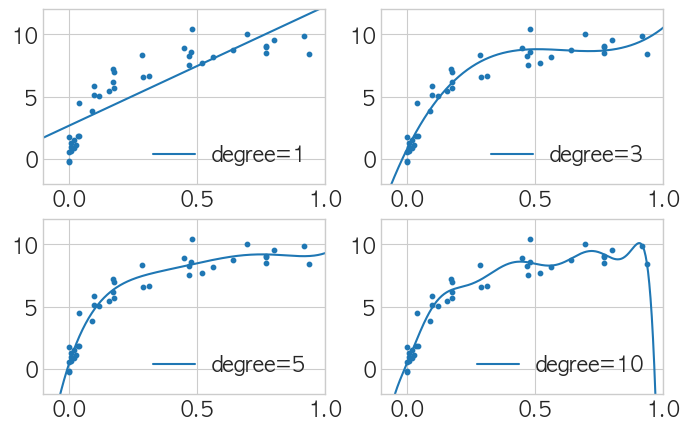

In [119]:
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1) # -0.1 ~ 1.1을 500등분 -> 2차원 배열로 test용 데이터 생성 

fig = plt.figure(figsize=(8, 5))
for i, degree in enumerate([1, 3, 5, 10], start=1) : # degree를 1, 3, 5, 10 으로 수정하며 반복
    ax = fig.add_subplot(2, 2, i) # subplot 생성
    ax.scatter(X.ravel(), y, s=10) # scatter size를 10으로 하여 찍기
    y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression()) \
        .fit(X, y).predict(X_test) # pipeline을 통해서 데이터 전처리부터 학습까지의 과정을 하나로 연결.
    ax.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2, 12)
    ax.legend(loc='best')

    # degree=1 -> under fitting, 고편향 모델 -> 모델의 복잡도를 높여야 할 필요가 있다.
    # degree=10 -> over fitting, 고분산 모델 -> 모델의 복잡도를 낮춰야 할 필요가 있다.

    # degree가 높아짐에 따라 학습 데이터에 최적화되는 것'처럼' 보인다.
    # 실제로 모든 점들을 지난다고 해서 모델이 가장 좋다고 판단할 수 없다. (복잡도가 높아지면 노이즈가 발생할 수 있어서)
    # 따라서 성능에 대한 판단은 더 많은 부분을 고려해야 한다.

# 검증 곡선
검증 곡선을 시각화하면 모델의 복잡도와 관련된 편향과 분산 사이의 트레이드오프 지점에서 적절한 지점을 확인 할 수 있다.
편향과 분산 사이의 트레이드오프에서 가장 효율적인 지점 ➡️ 최적의 모델

In [120]:
from sklearn.preprocessing import PolynomialFeatures # 모델 복잡도를 조절하기 위함(차수 조절)
from sklearn.linear_model import LinearRegression # 선형 모델을 만들기 위함
from sklearn.pipeline import make_pipeline # pipeline에 등록하면, 객체들이 seamless하게 수행되기 때문에 생산성이 높아짐
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("seaborn-whitegrid")

matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, '-' 마이너스 글자 깨지는 현상 해결

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_19786/3719028498.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [121]:
np.random.seed(1)
X = np.random.rand(40, 1) ** 2
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40) # 랜덤 값을 이용해 특징행렬 데이터 만들기
degree = np.arange(0, 21)

In [122]:
from sklearn.model_selection import validation_curve # 검증 곡선

train_score, val_score = validation_curve(make_pipeline(PolynomialFeatures(degree=2), LinearRegression()), \
    X, y, param_name='polynomialfeatures__degree', param_range=degree, cv=5) # degree 만들기


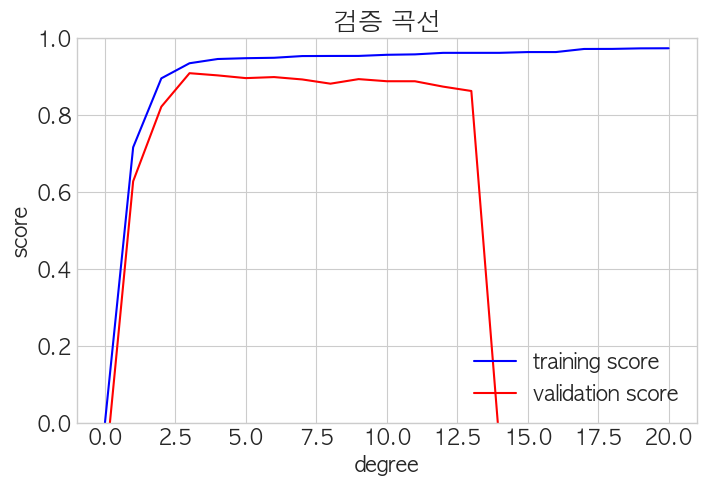

In [123]:
plt.figure(figsize=(8, 5))
plt.title('검증 곡선')
plt.plot(degree, np.median(train_score, 1), 'b-', label='training score')
plt.plot(degree, np.median(val_score, 1), 'r-', label='validation score')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.legend();

# degree가 3.0일 때, 검증 곡선 상에서 최적이라고 볼 수 있다.

In [124]:
# 테스트 데이터(특징 행렬) 생성
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)

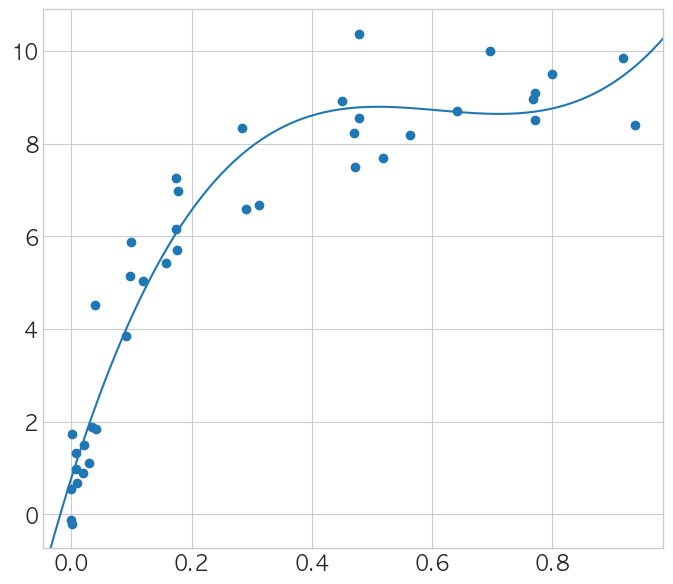

In [125]:
# degree 3.0에 대한 시각화 (검증 곡선 상에서 최적화된 모델 구성을 위한 degree 값으로 3이었음)
plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y)

# limit 정보 구성 -> 파이프라인 구성 -> 최종 모델과 데이터 적합 -> 검정
lim = plt.axis()  
y_pred = make_pipeline(PolynomialFeatures(degree=3), LinearRegression()).fit(X, y).predict(X_test)

plt.plot(X_test.ravel(), y_pred)
plt.axis(lim);

# 학습 곡선
: 최적의 모델은 훈련 데이터의 규모에도 의존함. <br>
훈련집합의 크기에 따른 훈련 점수/검증 점수의 plot <br>
(만약 검증 곡선에서 최적의 모델을 위한 degree가 3이었을 때, 데이터 규목 증가하니 최적의 모델을 위한 degree가 바뀌게 된다.)

In [126]:
from sklearn.model_selection import learning_curve

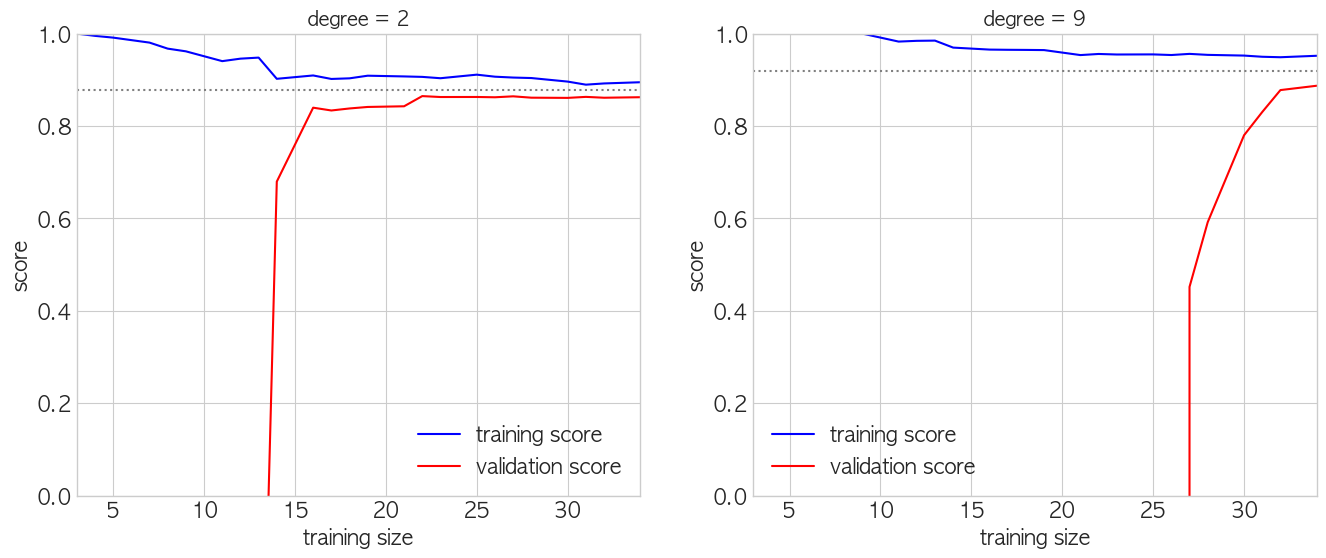

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for i, degree in enumerate([2, 9]) :
    n, train_lc, val_lc = learning_curve(make_pipeline(PolynomialFeatures(degree=degree), LinearRegression()), \
        X, y, cv=7, train_sizes=np.linspace(0.1, 1, 25))    
    ax[i].plot(n, np.mean(train_lc, 1), 'b-', label='training score')
    ax[i].plot(n, np.mean(val_lc, 1), 'r-', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), n[0], n[-1], color='gray', linestyles=':') # 수렴 지점에 점선 그리기
    ax[i].set(xlim=(n[0], n[-1]), ylim=(0, 1), xlabel='training size', ylabel='score')
    ax[i].set_title('degree = {}' .format(degree), size=14)
    ax[i].legend(loc='best');

# GridSearchCV
* 최적의 다항식 모델을 구하기 위한 GridSearchCV. 
* 그리드 서치는 검증 점수를 최대화하는 모델을 찾아내는 자동화 도구.


In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [180]:

alpha = np.linspace(0, 20, 20)
params = {
    'polynomialfeatures__degree': np.arange(21),
    'linearregression__fit_intercept': [True, False],
    'linearregression__copy_X': [True, False],
    'linearregression__n_jobs': [1, 2, 4],
    'linearregression__positive': [True, False]
}

grid = GridSearchCV(estimator=make_pipeline(PolynomialFeatures(), LinearRegression()), param_grid=params, cv=10)

In [181]:
grid.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__copy_X': [True, False],
                         'linearregression__fit_intercept': [True, False],
                         'linearregression__n_jobs': [1, 2, 4],
                         'linearregression__positive': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [182]:
# 가장 최적의 degree = 4
grid.best_params_

{'linearregression__copy_X': True,
 'linearregression__fit_intercept': False,
 'linearregression__n_jobs': 1,
 'linearregression__positive': False,
 'polynomialfeatures__degree': 4}

In [183]:
model = grid.best_estimator_
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression',
                 LinearRegression(fit_intercept=False, n_jobs=1))])

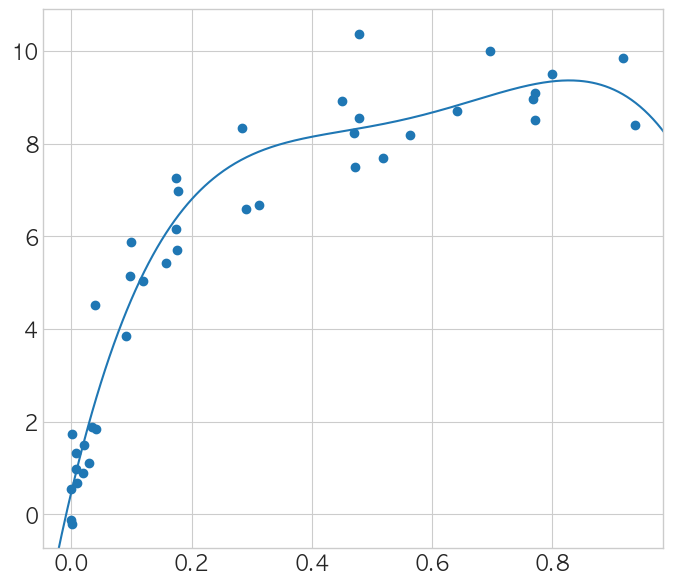

In [184]:
# 그리드 서치 시각화
plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_pred)
plt.axis(lim);